# **Proyek : Klasifikasi Gambar**
Deteksi jaringan saraf tiruan menggunakan TensorFlow bentuk tangan yang membentuk gunting, batu, atau kertas 

1.   Dataset dibagi menjadi train set dan validation set
2.   Mengimplementasikan augmentasi gambar
3.   Menggunakan image data generator
4.   Menggunakan model sequential
5.   Akurasi dari model minimal 85%

# **Biodata**

Nama : Yusriyah Isnaini Mufidah

email : yusriyahisna24@gmail.com

Google Collab Link : https://colab.research.google.com/drive/1PfGYjVUsvOJvzptwSFhIOJQW8BFF0eGn?usp=sharing

# **Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile, os, shutil

# **Download Dataset**

In [ ]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip

--2021-05-27 03:02:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.43MB/s    in 4m 43s  

2021-05-27 03:06:43 (1.09 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



# **Ekstract & Inisialisasi Data**

In [ ]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/submission')
zip_ref.close()

base_dir = '/submission/rockpaperscissors'
os.listdir(base_dir)

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [ ]:
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))
os.listdir(base_dir)

['paper', 'rock', 'scissors']

# **Split Folder**

In [ ]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

train_rock_dir = os.path.join(base_dir,'rock')
train_paper_dir = os.path.join(base_dir, 'paper')
train_scissors_dir = os.path.join(base_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

# **Image Generator**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150),
        batch_size=32, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **CNN**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 512)      

# **Compile model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# **Callback**

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, training dihentikan")
      self.model.stop_training = True

callback = Callback()

# **Train Model**

In [ ]:
hasil = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_generator,
    validation_steps=5,
    verbose=2,
    callbacks = [callback]
    )

Epoch 1/20
25/25 - 52s - loss: 0.9706 - accuracy: 0.5468 - val_loss: 0.8591 - val_accuracy: 0.6125
Epoch 2/20
25/25 - 51s - loss: 0.7041 - accuracy: 0.6844 - val_loss: 0.5793 - val_accuracy: 0.7625
Epoch 3/20
25/25 - 53s - loss: 0.5725 - accuracy: 0.7600 - val_loss: 0.6105 - val_accuracy: 0.8188
Epoch 4/20
25/25 - 53s - loss: 0.5782 - accuracy: 0.7538 - val_loss: 0.4476 - val_accuracy: 0.8375
Epoch 5/20
25/25 - 53s - loss: 0.4879 - accuracy: 0.7962 - val_loss: 0.4382 - val_accuracy: 0.7625
Epoch 6/20
25/25 - 53s - loss: 0.4118 - accuracy: 0.8338 - val_loss: 0.3241 - val_accuracy: 0.8750
Epoch 7/20
25/25 - 51s - loss: 0.3752 - accuracy: 0.8532 - val_loss: 0.3432 - val_accuracy: 0.8562
Epoch 8/20
25/25 - 51s - loss: 0.3285 - accuracy: 0.8727 - val_loss: 0.7835 - val_accuracy: 0.7188
Epoch 9/20
25/25 - 51s - loss: 0.4106 - accuracy: 0.8364 - val_loss: 0.2961 - val_accuracy: 0.8938
Epoch 10/20
25/25 - 53s - loss: 0.2796 - accuracy: 0.8863 - val_loss: 0.2204 - val_accuracy: 0.9375
Epoch 11/

# **Hasil Prediksi**

In [ ]:
import matplotlib.pyplot as plt

akurasi = hasil.history['accuracy']
validasi_akurasi = hasil.history['val_accuracy']

loss = hasil.history['loss']
validasi_loss = hasil.history['val_loss']

Akurasi Model

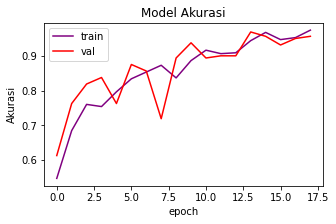

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize']= 5 , 3
plt.plot(akurasi, color='purple')
plt.plot(validasi_akurasi, color='red')
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model Loss

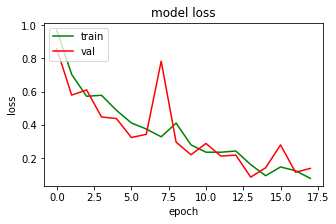

In [ ]:
plt.plot(loss, color='green')
plt.plot(validasi_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Test Model**

Saving 2vDaPrc35RGC8nvM.png to 2vDaPrc35RGC8nvM.png
Scissor


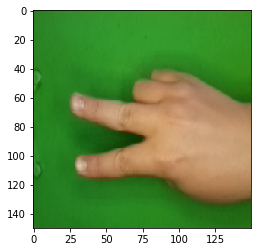

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  prob = model.predict(images) 
  classes = prob.argmax(axis=1)
  
  if classes == 0:
    print("Paper")
  elif classes == 1:
    print("Rock")
  elif classes == 2:
    print("Scissor")